<a href="https://colab.research.google.com/github/sarinw/Project-EcommerceU/blob/main/EcommerceU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Backrgound

Project Background : EcommerceU is a growing e-commerce platform. This year (2023), EcommerceU Company seeks to change the way organisations view business performance by using more data to make decisions. Therefore, experts, as the person in charge of this change, try to guide the Data Analyst team to provide the proper evaluation and advice regarding how data can be used to provide analysis on the decision-making process that occurs in EcommerceU Company.

Project Objectives : The expert hopes that this project can help EcommerceU as a Company to provide some support and insight by using a data analysis approach from the business performance that has been running throughout 2020-2021. Some of the support and insights that are sought to be obtained using a data analysis approach are as follows.

>  ❗Disclaimer: This is one of the tools I use to complete projects. I also utilize SQL, Excel, and Tableau for project completion.

---




#Library

In [97]:
#Packages
!pip install apyori  ## Installing apriori library
import numpy as np # linear algebra
import pandas as pd # Data pre-processing
import seaborn as sns # Required for plotting
import matplotlib.pyplot as plt # Required for plotting
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn import cluster

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Gathering

## Transaction Item

In [99]:
#Reading Dataset
df_transaction_item = pd.read_csv('/content/drive/MyDrive/data/transaction_items.csv')
df_transaction_item.head()

transactions_id  transaction_items_id  product_qty  product_amount  \
0               63                   185            4          800000   
1              198                   602            4          800000   
2             1554                  5066            4          800000   
3             1720                  5607            4          800000   
4             4632                 15048            4          800000   

   product_price  product_id  
0         200000          14  
1         200000          14  
2         200000          14  
3         200000          14  
4         200000          14

## Event

In [100]:
#Reading Dataset
df_events = pd.read_csv('/content/drive/MyDrive/data/events.csv')
df_events.head()

sessions_id  event_id   event                timestamp
0         5241     14856  cancel  2020-04-04 10:39:07 UTC
1        54633    162598  cancel  2021-03-20 11:56:12 UTC
2       143144    430354  cancel  2022-05-16 10:29:09 UTC
3        60456    181396  cancel  2021-04-25 06:24:44 UTC
4       184742    549240  cancel  2022-12-11 19:14:21 UTC

## Locations

In [101]:
#Reading Dataset
df_locations = pd.read_csv('/content/drive/MyDrive/data/locations.csv')
df_locations

locations_id           location
0              1            Bandung
1              2      Jakarta Barat
2              3      Jakarta Pusat
3              4    Jakarta Selatan
4              5      Jakarta Timur
5              6      Jakarta Utara
6              7        Kota Bekasi
7              8         Kota Bogor
8              9         Kota Depok
9             10     Kota Tangerang
10            11           Semarang
11            12           Surabaya
12            13  Tangerang Selatan

## Payment Methods

In [102]:
#Reading Dataset
df_payment_methods = pd.read_csv('/content/drive/MyDrive/data/payment_methods.csv')
df_payment_methods

payment_method  payment_method_id
0  Biller Services                  1
1      Credit Card                  2
2            Debit                  3
3         E-Wallet                  4
4         Paylater                  5
5  Virtual Account                  6

## Product

In [103]:
#Reading Dataset
df_products = pd.read_csv('/content/drive/MyDrive/data/products.csv')
df_products.head()

product_category product_name  product_id
0         Clothing   Clothing A           1
1         Clothing   Clothing B           2
2         Clothing   Clothing C           3
3         Clothing   Clothing D           4
4         Clothing   Clothing E           5

## Sessions

In [104]:
#Reading Dataset
df_sessions = pd.read_csv('/content/drive/MyDrive/data/sessions.csv')
df_sessions.head()

sessions_id  user_id traffic_medium        visits_timestamps  \
0           14       14         Direct  2019-12-01 10:50:22 UTC   
1           20       20         Direct  2019-12-01 15:21:52 UTC   
2           70       63         Direct  2019-12-04 17:37:37 UTC   
3           71       64         Direct  2019-12-04 18:20:05 UTC   
4           72       65         Direct  2019-12-04 19:06:27 UTC   

  traffic_source traffic_name  
0         Direct          NaN  
1         Direct          NaN  
2         Direct          NaN  
3         Direct          NaN  
4         Direct          NaN

In [105]:
df_sessions

sessions_id  user_id traffic_medium        visits_timestamps  \
0                14       14         Direct  2019-12-01 10:50:22 UTC   
1                20       20         Direct  2019-12-01 15:21:52 UTC   
2                70       63         Direct  2019-12-04 17:37:37 UTC   
3                71       64         Direct  2019-12-04 18:20:05 UTC   
4                72       65         Direct  2019-12-04 19:06:27 UTC   
...             ...      ...            ...                      ...   
190968        80921     6208            NaN  2021-09-16 03:05:59 UTC   
190969        81688     6287            NaN  2021-09-20 20:55:29 UTC   
190970        81750     6210            NaN  2021-09-21 10:58:11 UTC   
190971        81764     6226            NaN  2021-09-21 12:20:37 UTC   
190972        81804     6279            NaN  2021-09-21 19:57:21 UTC   

       traffic_source   traffic_name  
0              Direct            NaN  
1              Direct            NaN  
2              Direct            NaN  
3              Direct            NaN  
4              Direct            NaN  
...               ...            ...  
190968            NaN  google search  
190969            NaN  google search  
190970            NaN  google search  
190971            NaN  google search  
190972            NaN  google search  

[190973 rows x 6 columns]

## Transactions

In [106]:
#Reading Dataset
df_transactions = pd.read_csv('/content/drive/MyDrive/data/transactions.csv')
df_transactions.head()


transactions_id  sessions_id  payment_method_id  total_amount  \
0             6261        61939                  1        935000   
1            11484       115377                  1         60000   
2            17261       166707                  1       3205000   
3            10978       110160                  1       2850000   
4            12166       122462                  1         55000   

   transactions_timestamps    status  voucher_id  
0  2021-05-05 04:16:02 UTC  canceled           1  
1  2022-01-02 08:33:16 UTC  canceled           1  
2  2022-10-20 13:55:19 UTC  canceled           1  
3  2021-12-18 11:23:49 UTC  canceled           1  
4  2022-02-04 06:24:09 UTC  canceled           1

## Users

In [107]:
#Reading Dataset
df_users = pd.read_csv('/content/drive/MyDrive/data/users.csv')
df_users.head()

user_id            register_date  locations_id  age gender
0     1661  2020-06-03 09:34:31 UTC             1   15   Male
1      676  2020-02-13 17:20:23 UTC            13   15   Male
2      336  2020-01-06 21:52:37 UTC             2   15   Male
3     8232  2022-05-31 05:46:14 UTC            11   15   Male
4     2794  2020-10-01 03:43:57 UTC             2   15   Male

## Vouchers

In [108]:
#Reading Dataset
df_vouchers = pd.read_csv('/content/drive/MyDrive/data/vouchers.csv')
df_vouchers

voucher  voucher_id
0                Cashback           1
1  Delivery Fee Discounts           2
2         Direct Discount           3
3            No Discounts           4

# Data cleaning

### Transform data to string

In [109]:
df_transaction_item['transactions_id'] = df_transaction_item['transactions_id'].apply(str)
df_transaction_item['transaction_items_id'] = df_transaction_item['transaction_items_id'].apply(str)
df_transaction_item['product_id'] = df_transaction_item['product_id'].apply(str)
df_events['sessions_id'] = df_events['sessions_id'].apply(str)
df_events['event_id'] = df_events['event_id'].apply(str)
df_locations['locations_id'] = df_locations['locations_id'].apply(str)
df_payment_methods['payment_method_id'] = df_payment_methods['payment_method_id'].apply(str)
df_products['product_id'] = df_products['product_id'].apply(str)
df_sessions['sessions_id'] = df_sessions['sessions_id'].apply(str)
df_sessions['user_id'] = df_sessions['user_id'].apply(str)
df_transactions['payment_method_id'] = df_transactions['payment_method_id'].apply(str)
df_transactions['sessions_id'] = df_transactions['sessions_id'].apply(str)
df_transactions['voucher_id'] = df_transactions['voucher_id'].apply(str)
df_transactions['transactions_id'] = df_transactions['transactions_id'].apply(str)
df_users['user_id'] = df_users['user_id'].apply(str)
df_users['locations_id'] = df_users['locations_id'].apply(str)
df_vouchers['voucher_id'] = df_vouchers['voucher_id'].apply(str)

### Transform data to datetime

In [110]:
df_users['register_date'] = pd.to_datetime(df_users['register_date'])
df_sessions['visits_timestamps'] = pd.to_datetime(df_sessions['visits_timestamps'])
df_events['timestamp'] = pd.to_datetime(df_events['timestamp'])
df_transactions['transactions_timestamps'] = pd.to_datetime(df_transactions['transactions_timestamps'])

## Data info

In [111]:
df_transactions.info()
df_transaction_item.info()
df_events.info()
df_locations.info()
df_payment_methods.info()
df_products.info()
df_sessions.info()
df_users.info()
df_vouchers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19173 entries, 0 to 19172
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   transactions_id          19173 non-null  object             
 1   sessions_id              19173 non-null  object             
 2   payment_method_id        19173 non-null  object             
 3   total_amount             19173 non-null  int64              
 4   transactions_timestamps  19173 non-null  datetime64[ns, UTC]
 5   status                   19173 non-null  object             
 6   voucher_id               19173 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59520 entries, 0 to 59519
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   transaction

## Cek Isna

In [112]:
df_transactions.isna().sum() #Checking missing value

transactions_id            0
sessions_id                0
payment_method_id          0
total_amount               0
transactions_timestamps    0
status                     0
voucher_id                 0
dtype: int64

In [113]:
df_transaction_item.isna().sum() #Checking missing value

transactions_id         0
transaction_items_id    0
product_qty             0
product_amount          0
product_price           0
product_id              0
dtype: int64

In [114]:
df_events.isna().sum() #Checking missing value

sessions_id    0
event_id       0
event          0
timestamp      0
dtype: int64

In [115]:
df_locations.isna().sum() #Checking missing value

locations_id    0
location        0
dtype: int64

In [116]:
df_payment_methods.isna().sum() #Checking missing value

payment_method       0
payment_method_id    0
dtype: int64

In [117]:
df_products.isna().sum() #Checking missing value

product_category    0
product_name        0
product_id          0
dtype: int64

In [118]:
df_users.isna().sum() #Checking missing value

user_id          0
register_date    0
locations_id     0
age              0
gender           0
dtype: int64

In [119]:
df_vouchers.isna().sum() #Checking missing value

voucher       0
voucher_id    0
dtype: int64

## Fill nul in data sessions

In [120]:
df_sessions.isna().sum() #Checking missing value

sessions_id              0
user_id                  0
traffic_medium       52117
visits_timestamps        0
traffic_source       37435
traffic_name         95610
dtype: int64

In [121]:
df_sessions['traffic_medium'].unique().tolist() #To check the unique string value in column

['Direct', 'Organic Search', 'Organic Social', nan, 'Email', 'CPC']

In [122]:
df_sessions['traffic_source'].unique().tolist()

['Direct', 'Google', 'Facebook', 'Instagram', 'Newsletter', nan]

In [123]:
df_sessions['traffic_name'].unique().tolist()

[nan, 'Facebook', 'Instagram', 'youtube.com', 'google search']

In [124]:
df_sessions_ref = df_sessions.copy() #To make sure the difference could be seen(before-after)
df_sessions_ref ['traffic_medium']= df_sessions_ref ['traffic_medium'].fillna ('unknown traffic') #Fill missing value with 'unknown traffic'
df_sessions_ref ['traffic_source']= df_sessions_ref ['traffic_source'].fillna ('unknown traffic') #Fill missing value with 'unknown traffic'
df_sessions_ref ['traffic_name']= df_sessions_ref ['traffic_name'].fillna ('unknown traffic') #Fill missing value with 'unknown traffic'
df_sessions_ref.isna().sum() #Checking the missing value (to make sure all missing value are handled)

sessions_id          0
user_id              0
traffic_medium       0
visits_timestamps    0
traffic_source       0
traffic_name         0
dtype: int64

## Outlier

### Outlier data transactions

<Axes: >

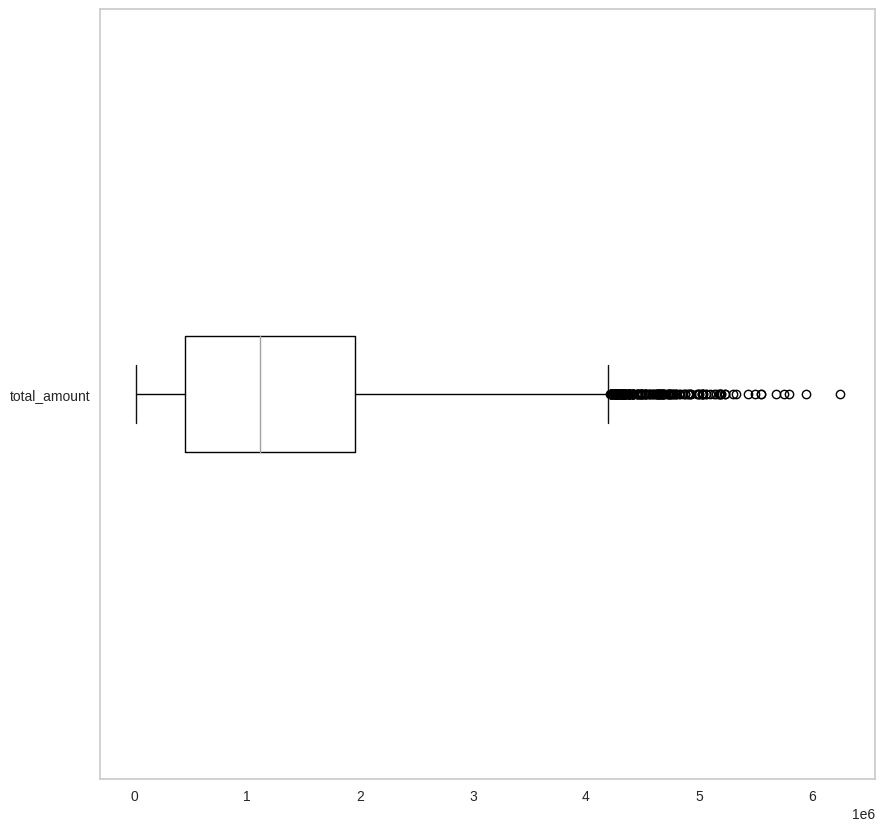

In [125]:
df_transactions.boxplot(column=['total_amount'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)

In [126]:
Q1 = df_transactions['total_amount'].quantile(0.25)
Q3 = df_transactions['total_amount'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 450000.0

Q3:
 1955000.0

IQR:
 1505000.0

Min:
 -1807500.0

Max:
 4212500.0


In [127]:
filter_total_amount_min = df_transactions['total_amount']<boxplot_min
filter_total_amount_max = df_transactions['total_amount']>boxplot_max

df_trans_non_outlier = df_transactions [~(filter_total_amount_min|filter_total_amount_max)]

df_trans_non_outlier

transactions_id sessions_id payment_method_id  total_amount  \
0                6261       61939                 1        935000   
1               11484      115377                 1         60000   
2               17261      166707                 1       3205000   
3               10978      110160                 1       2850000   
4               12166      122462                 1         55000   
...               ...         ...               ...           ...   
19168           12903      130240                 6        900000   
19169           10535      105357                 6       2830000   
19170            4422       46446                 6        685000   
19171            7848       76916                 6       2230000   
19172            6423       63391                 6        875000   

        transactions_timestamps     status voucher_id  
0     2021-05-05 04:16:02+00:00   canceled          1  
1     2022-01-02 08:33:16+00:00   canceled          1  
2     2022-10-20 13:55:19+00:00   canceled          1  
3     2021-12-18 11:23:49+00:00   canceled          1  
4     2022-02-04 06:24:09+00:00   canceled          1  
...                         ...        ...        ...  
19168 2022-03-07 13:30:10+00:00  completed          4  
19169 2021-12-04 20:11:47+00:00  completed          4  
19170 2021-02-03 18:35:57+00:00  completed          4  
19171 2021-08-17 15:47:09+00:00  completed          4  
19172 2021-05-15 16:15:12+00:00  completed          4  

[18983 rows x 7 columns]

In [128]:
df_trans_outlier = df_transactions[(filter_total_amount_min|filter_total_amount_max)]
print(df_trans_outlier);

      transactions_id sessions_id payment_method_id  total_amount  \
77              14545      144085                 4       4500000   
138             18819      186526                 4       5180000   
162              6571       64695                 4       4650000   
167             11149      111932                 6       4285000   
410             11934      120134                 6       4800000   
...               ...         ...               ...           ...   
18507           12694      127961                 5       4260000   
18618            4951       50990                 3       4290000   
19000            3245       33739                 4       4330000   
19076            7353       71572                 4       4230000   
19150            6798       66668                 4       4250000   

        transactions_timestamps     status voucher_id  
77    2022-05-22 13:34:39+00:00   canceled          1  
138   2022-12-18 06:00:00+00:00   canceled          1  
162

In [129]:
df_trans_non_outlier['total_amount'].mean()

1277933.6775009218

<Axes: >

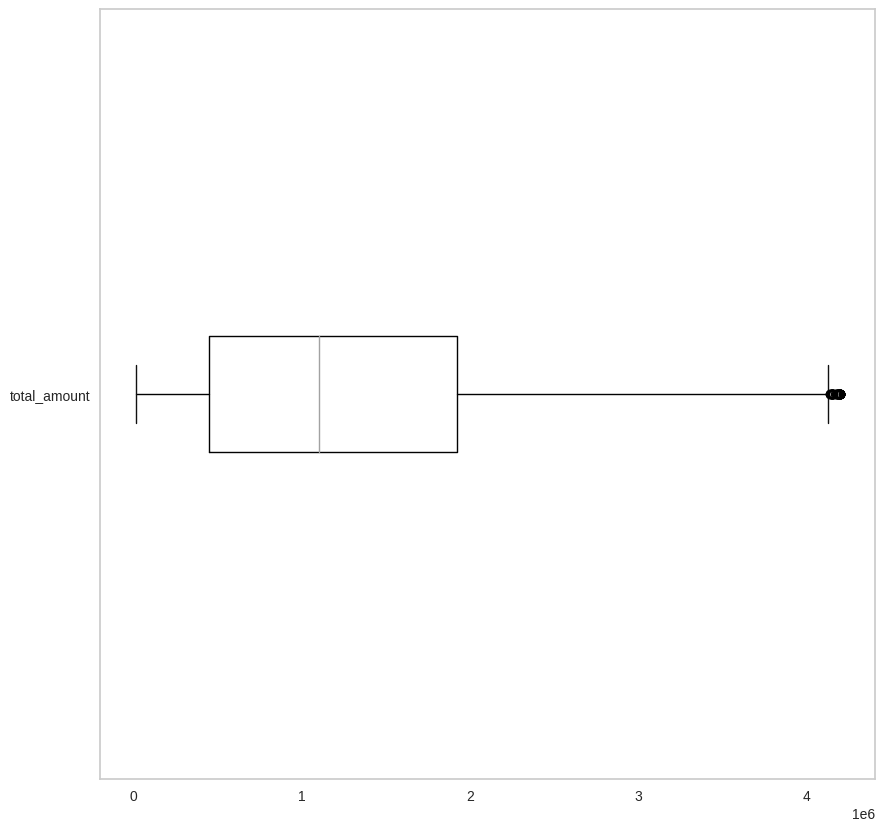

In [130]:
df_trans_non_outlier.boxplot(column=['total_amount'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)

### Outlier data transactions_item

#### Product_qty

<Axes: >

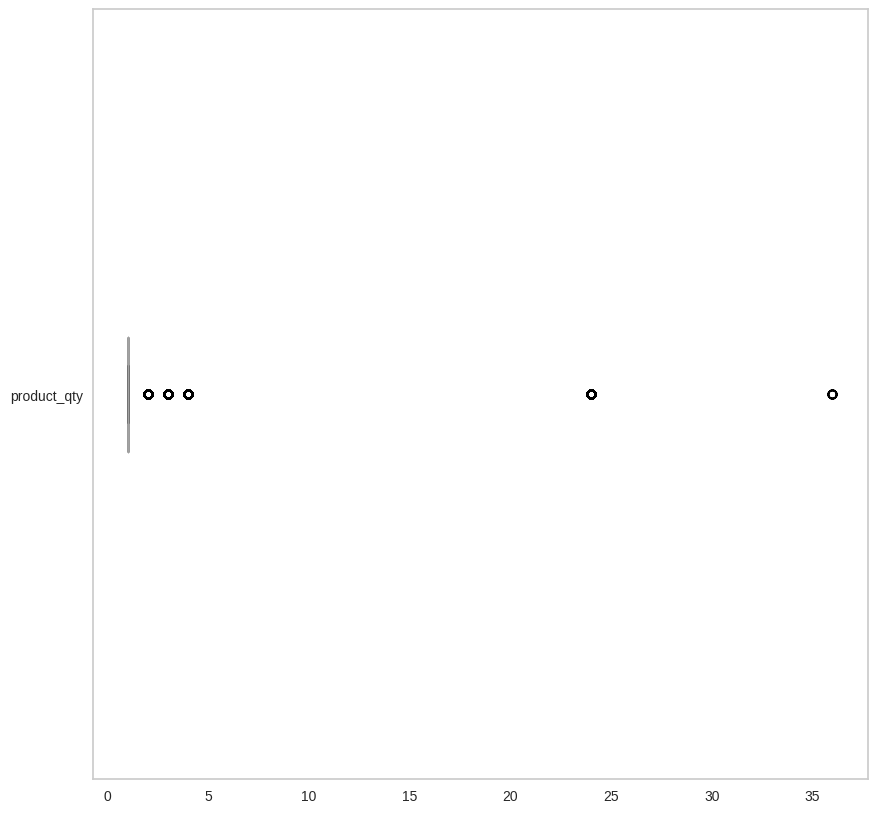

In [131]:
df_transaction_item.boxplot(column=['product_qty'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)

In [132]:
Q1 = df_transaction_item['product_qty'].quantile(0.25)
Q3 = df_transaction_item['product_qty'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 1.0

Q3:
 1.0

IQR:
 0.0

Min:
 1.0

Max:
 1.0


Outlier product_qty tidak dihapus, karena batas bawah dan batas atas (1)

#### Product_amount

<Axes: >

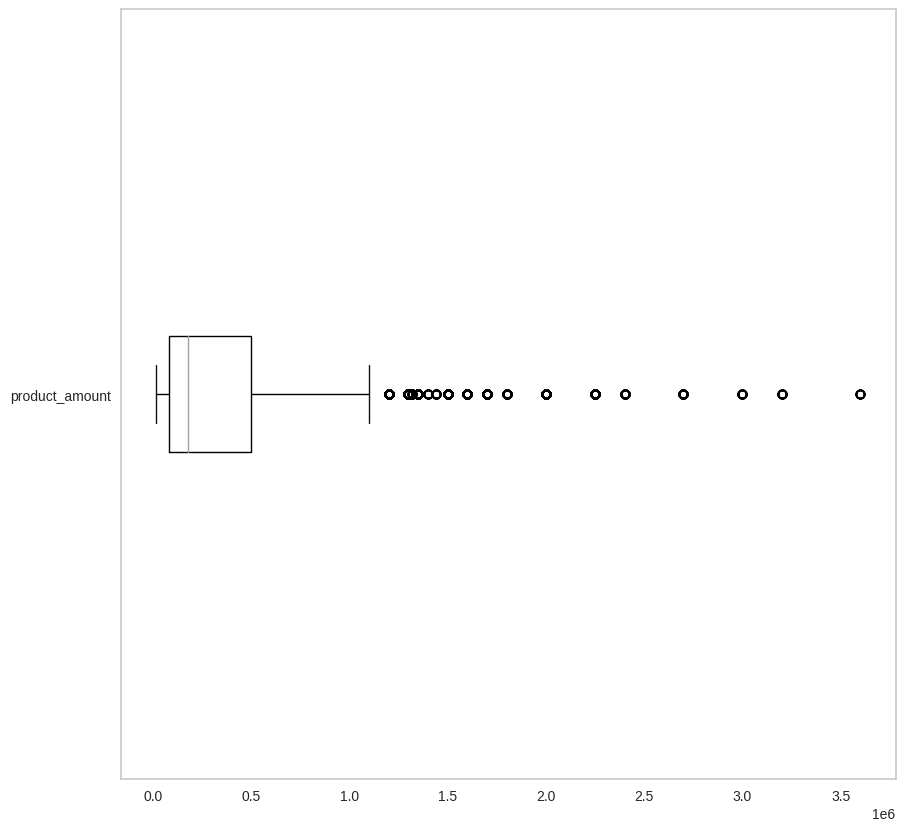

In [133]:
df_transaction_item.boxplot(column=['product_amount'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)

In [134]:
Q1 = df_transaction_item['product_amount'].quantile(0.25)
Q3 = df_transaction_item['product_amount'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 80000.0

Q3:
 500000.0

IQR:
 420000.0

Min:
 -550000.0

Max:
 1130000.0


outlier pada data product_amount tidak dihapus karena diatas 13%

#### Product_price

<Axes: >

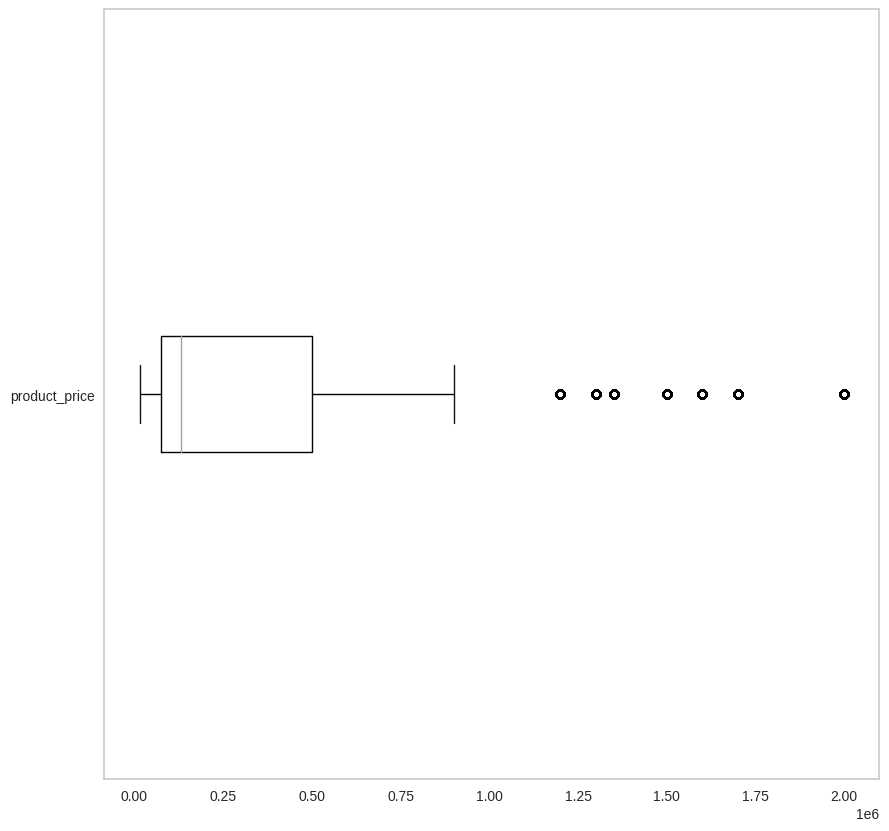

In [135]:
df_transaction_item.boxplot(column=['product_price'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)

In [136]:
Q1 = df_transaction_item['product_price'].quantile(0.25)
Q3 = df_transaction_item['product_price'].quantile(0.75)

IQR = Q3 - Q1
boxplot_min = Q1 - 1.5 * IQR
boxplot_max = Q3 + 1.5 * IQR
print('Q1:\n',Q1)
print('\nQ3:\n',Q3)
print('\nIQR:\n',IQR)
print('\nMin:\n',boxplot_min)
print('\nMax:\n',boxplot_max)

Q1:
 75000.0

Q3:
 500000.0

IQR:
 425000.0

Min:
 -562500.0

Max:
 1137500.0


### Outlier data users



#### Age

<Axes: >

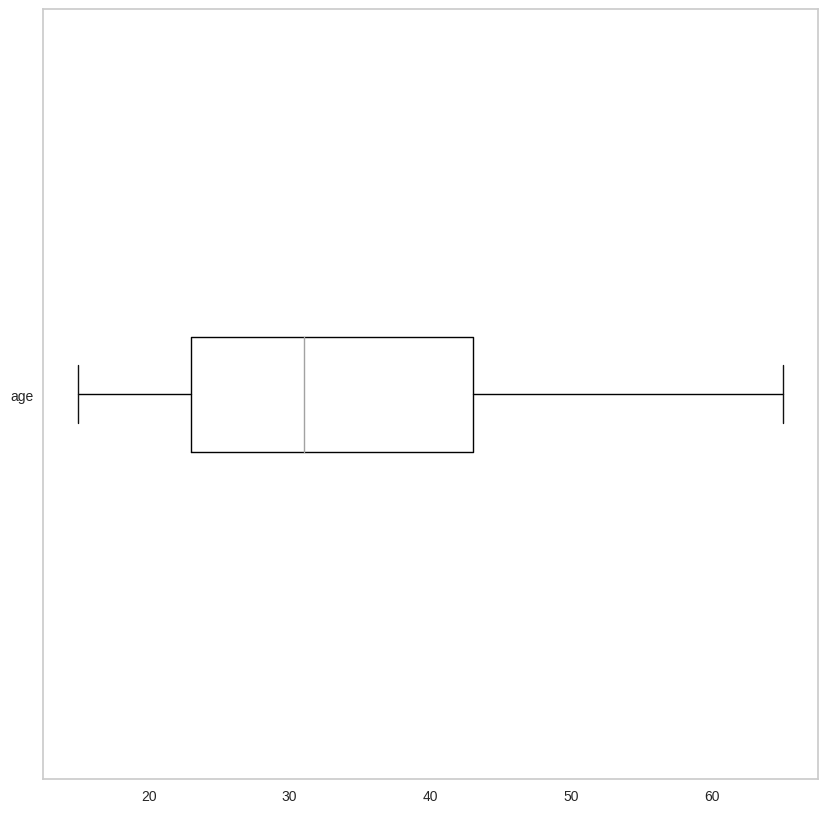

In [137]:
df_users.boxplot(column=['age'],fontsize=10,
           rot=0,grid=False,figsize=(10,10),vert=False)

no outlier

# Download data

Transaction_item

In [138]:
#df_transaction_item.to_csv('df_transaction_item.csv', index=False)

In [139]:
#! ls

In [140]:
#! cat df_sales_city.csv

Locations

In [141]:
#df_locations.to_csv('df_locations.csv', index=False)

Payment methods

In [142]:
#df_payment_methods.to_csv('df_payment_methods.csv', index=False)

In [143]:
#df_products.to_csv('df_products.csv', index=False)

In [144]:
#df_transactions.to_csv('df_transactions.csv', index=False)

In [145]:
#df_users.to_csv('df_users.csv', index=False)

In [146]:
#df_vouchers.to_csv('df_vouchers.csv', index=False)

# Merge Data

In [147]:
sess_trans = df_sessions_ref.merge(df_transactions,how='left',on=['sessions_id'])
sess_trans

sessions_id user_id   traffic_medium         visits_timestamps  \
0               14      14           Direct 2019-12-01 10:50:22+00:00   
1               20      20           Direct 2019-12-01 15:21:52+00:00   
2               70      63           Direct 2019-12-04 17:37:37+00:00   
3               71      64           Direct 2019-12-04 18:20:05+00:00   
4               72      65           Direct 2019-12-04 19:06:27+00:00   
...            ...     ...              ...                       ...   
190968       80921    6208  unknown traffic 2021-09-16 03:05:59+00:00   
190969       81688    6287  unknown traffic 2021-09-20 20:55:29+00:00   
190970       81750    6210  unknown traffic 2021-09-21 10:58:11+00:00   
190971       81764    6226  unknown traffic 2021-09-21 12:20:37+00:00   
190972       81804    6279  unknown traffic 2021-09-21 19:57:21+00:00   

         traffic_source     traffic_name transactions_id payment_method_id  \
0                Direct  unknown traffic             NaN               NaN   
1                Direct  unknown traffic             NaN               NaN   
2                Direct  unknown traffic             NaN               NaN   
3                Direct  unknown traffic             NaN               NaN   
4                Direct  unknown traffic               9                 5   
...                 ...              ...             ...               ...   
190968  unknown traffic    google search             NaN               NaN   
190969  unknown traffic    google search             NaN               NaN   
190970  unknown traffic    google search             NaN               NaN   
190971  unknown traffic    google search             NaN               NaN   
190972  unknown traffic    google search             NaN               NaN   

        total_amount   transactions_timestamps     status voucher_id  
0                NaN                       NaT        NaN        NaN  
1                NaN                       NaT        NaN        NaN  
2                NaN                       NaT        NaN        NaN  
3                NaN                       NaT        NaN        NaN  
4           220000.0 2019-12-04 19:15:33+00:00  completed          4  
...              ...                       ...        ...        ...  
190968           NaN                       NaT        NaN        NaN  
190969           NaN                       NaT        NaN        NaN  
190970           NaN                       NaT        NaN        NaN  
190971           NaN                       NaT        NaN        NaN  
190972           NaN                       NaT        NaN        NaN  

[190973 rows x 12 columns]

In [148]:
sess_trans=sess_trans.drop(['traffic_medium','visits_timestamps','traffic_source','traffic_name' ],axis=1)
sess_trans

sessions_id user_id transactions_id payment_method_id  total_amount  \
0               14      14             NaN               NaN           NaN   
1               20      20             NaN               NaN           NaN   
2               70      63             NaN               NaN           NaN   
3               71      64             NaN               NaN           NaN   
4               72      65               9                 5      220000.0   
...            ...     ...             ...               ...           ...   
190968       80921    6208             NaN               NaN           NaN   
190969       81688    6287             NaN               NaN           NaN   
190970       81750    6210             NaN               NaN           NaN   
190971       81764    6226             NaN               NaN           NaN   
190972       81804    6279             NaN               NaN           NaN   

         transactions_timestamps     status voucher_id  
0                            NaT        NaN        NaN  
1                            NaT        NaN        NaN  
2                            NaT        NaN        NaN  
3                            NaT        NaN        NaN  
4      2019-12-04 19:15:33+00:00  completed          4  
...                          ...        ...        ...  
190968                       NaT        NaN        NaN  
190969                       NaT        NaN        NaN  
190970                       NaT        NaN        NaN  
190971                       NaT        NaN        NaN  
190972                       NaT        NaN        NaN  

[190973 rows x 8 columns]

In [149]:
sess_trans.isna().sum() #Checking missing value

sessions_id                     0
user_id                         0
transactions_id            171800
payment_method_id          171800
total_amount               171800
transactions_timestamps    171800
status                     171800
voucher_id                 171800
dtype: int64

In [150]:
sess_trans.dropna(axis=0, inplace=True)

In [151]:
sess_trans = sess_trans[~sess_trans['status'].str.contains('canceled')]

In [152]:
sess_trans.isna().sum() #Checking missing value

sessions_id                0
user_id                    0
transactions_id            0
payment_method_id          0
total_amount               0
transactions_timestamps    0
status                     0
voucher_id                 0
dtype: int64

In [153]:
sess_trans['status'].unique()

array(['completed'], dtype=object)

# RFM

#### Time last order

In [154]:
last_date=sess_trans['transactions_timestamps'].max()

In [155]:
df_time_last_order = sess_trans.copy()
df_time_last_order['time_last_order'] = last_date - sess_trans['transactions_timestamps']
df_time_last_order

sessions_id user_id transactions_id payment_method_id  total_amount  \
4               72      65               9                 5      220000.0   
42             504     167              35                 4      365000.0   
43             532       5              36                 2      505000.0   
59             621     218              45                 6     2200000.0   
71             756     295              56                 2     1990000.0   
...            ...     ...             ...               ...           ...   
189427      116086    4163           11548                 2     2155000.0   
189428      121741    5450           12096                 2     2150000.0   
189429      118166    1011           11744                 2      845000.0   
189430      115112    6638           11462                 6     1725000.0   
189431      129584    5509           12840                 6      420000.0   

         transactions_timestamps     status voucher_id    time_last_order  
4      2019-12-04 19:15:33+00:00  completed          4 1123 days 03:30:47  
42     2019-12-24 20:20:58+00:00  completed          4 1103 days 02:25:22  
43     2019-12-25 23:37:11+00:00  completed          1 1101 days 23:09:09  
59     2019-12-30 17:55:08+00:00  completed          4 1097 days 04:51:12  
71     2020-01-05 03:16:34+00:00  completed          1 1091 days 19:29:46  
...                          ...        ...        ...                ...  
189427 2022-01-05 11:39:57+00:00  completed          4  360 days 11:06:23  
189428 2022-01-30 20:44:55+00:00  completed          4  335 days 02:01:25  
189429 2022-01-15 06:53:36+00:00  completed          4  350 days 15:52:44  
189430 2022-01-01 10:07:05+00:00  completed          4  364 days 12:39:15  
189431 2022-03-05 15:52:31+00:00  completed          4  301 days 06:53:49  

[12328 rows x 9 columns]

In [156]:
df_recency = df_time_last_order.groupby('user_id').agg(recency=('time_last_order','min')).reset_index()

df_frequence = sess_trans[sess_trans['status'] == 'completed']
df_frequence = df_frequence.groupby('user_id').agg(frequence=('user_id', 'count')).reset_index()

df_monetary = sess_trans[sess_trans['status'] == 'completed']
df_monetary = sess_trans.groupby('user_id').agg(monetary=('total_amount', 'sum')).reset_index()

df_rfm = pd.merge(df_recency, df_frequence, on='user_id')
df_rfm = pd.merge(df_rfm, df_monetary, on='user_id')
df_rfm

user_id           recency  frequence    monetary
0          1 483 days 09:28:46          1    135000.0
1         10 109 days 02:17:57          5  12270000.0
2        100 523 days 21:02:57          4   3000000.0
3       1002 444 days 19:30:44          3   5415000.0
4       1003 328 days 00:53:22          2   2760000.0
...      ...               ...        ...         ...
5808     992 241 days 07:29:20          3   3690000.0
5809     993 855 days 02:51:22          3   4365000.0
5810     994  20 days 08:59:55          1     75000.0
5811     997 818 days 21:05:03          1     95000.0
5812     998 617 days 05:38:55          4   5530000.0

[5813 rows x 4 columns]

In [157]:
df_rfm['recency'] = df_rfm['recency'].dt.days.astype('int64')

In [158]:
df_rfm['monetary'] = df_rfm['monetary'].astype(int)

In [159]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5813 entries, 0 to 5812
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    5813 non-null   object
 1   recency    5813 non-null   int64 
 2   frequence  5813 non-null   int64 
 3   monetary   5813 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 227.1+ KB


# Clustering

## K-means

### Elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


1 4.888786582557976e+16


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


2 1.5921896262142316e+16


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3 6257379664579500.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


4 3497622069060827.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 2237052056757888.5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


6 1529560659308473.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


7 1097249601656464.5


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


8 819865112127757.8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


9 661894272591896.1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


10 544813652838739.25


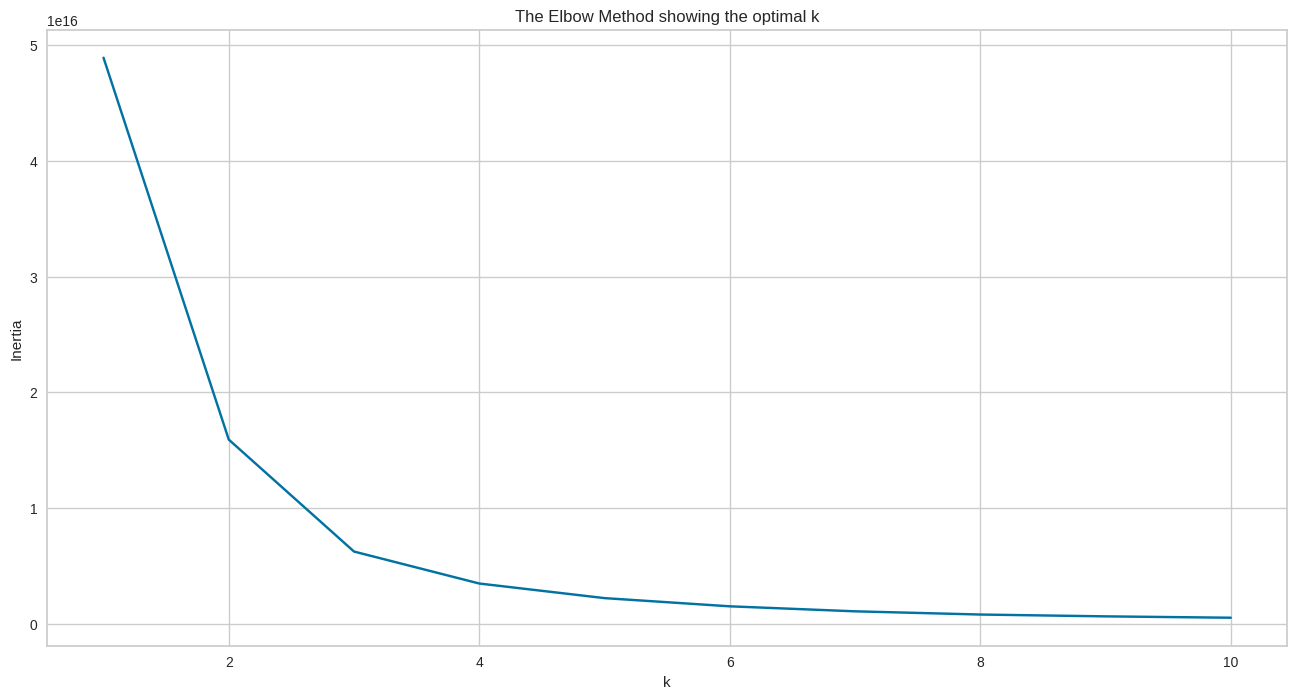

In [201]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k, random_state = 7)
    kmeanModel.fit(df_rfm)
    distortions.append(kmeanModel.inertia_)
    print(k, kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

### Silhoutte score plot

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=2, the average silhouette score is 0.6370158350135163


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=3, the average silhouette score is 0.6848848455353524


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=4, the average silhouette score is 0.6831238766374956


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=5, the average silhouette score is 0.6815653406320484


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=6, the average silhouette score is 0.6807578036668455


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=7, the average silhouette score is 0.6818527967341858


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=8, the average silhouette score is 0.6825874609474806


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=9, the average silhouette score is 0.6788910319917342


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=10, the average silhouette score is 0.6798697324731885


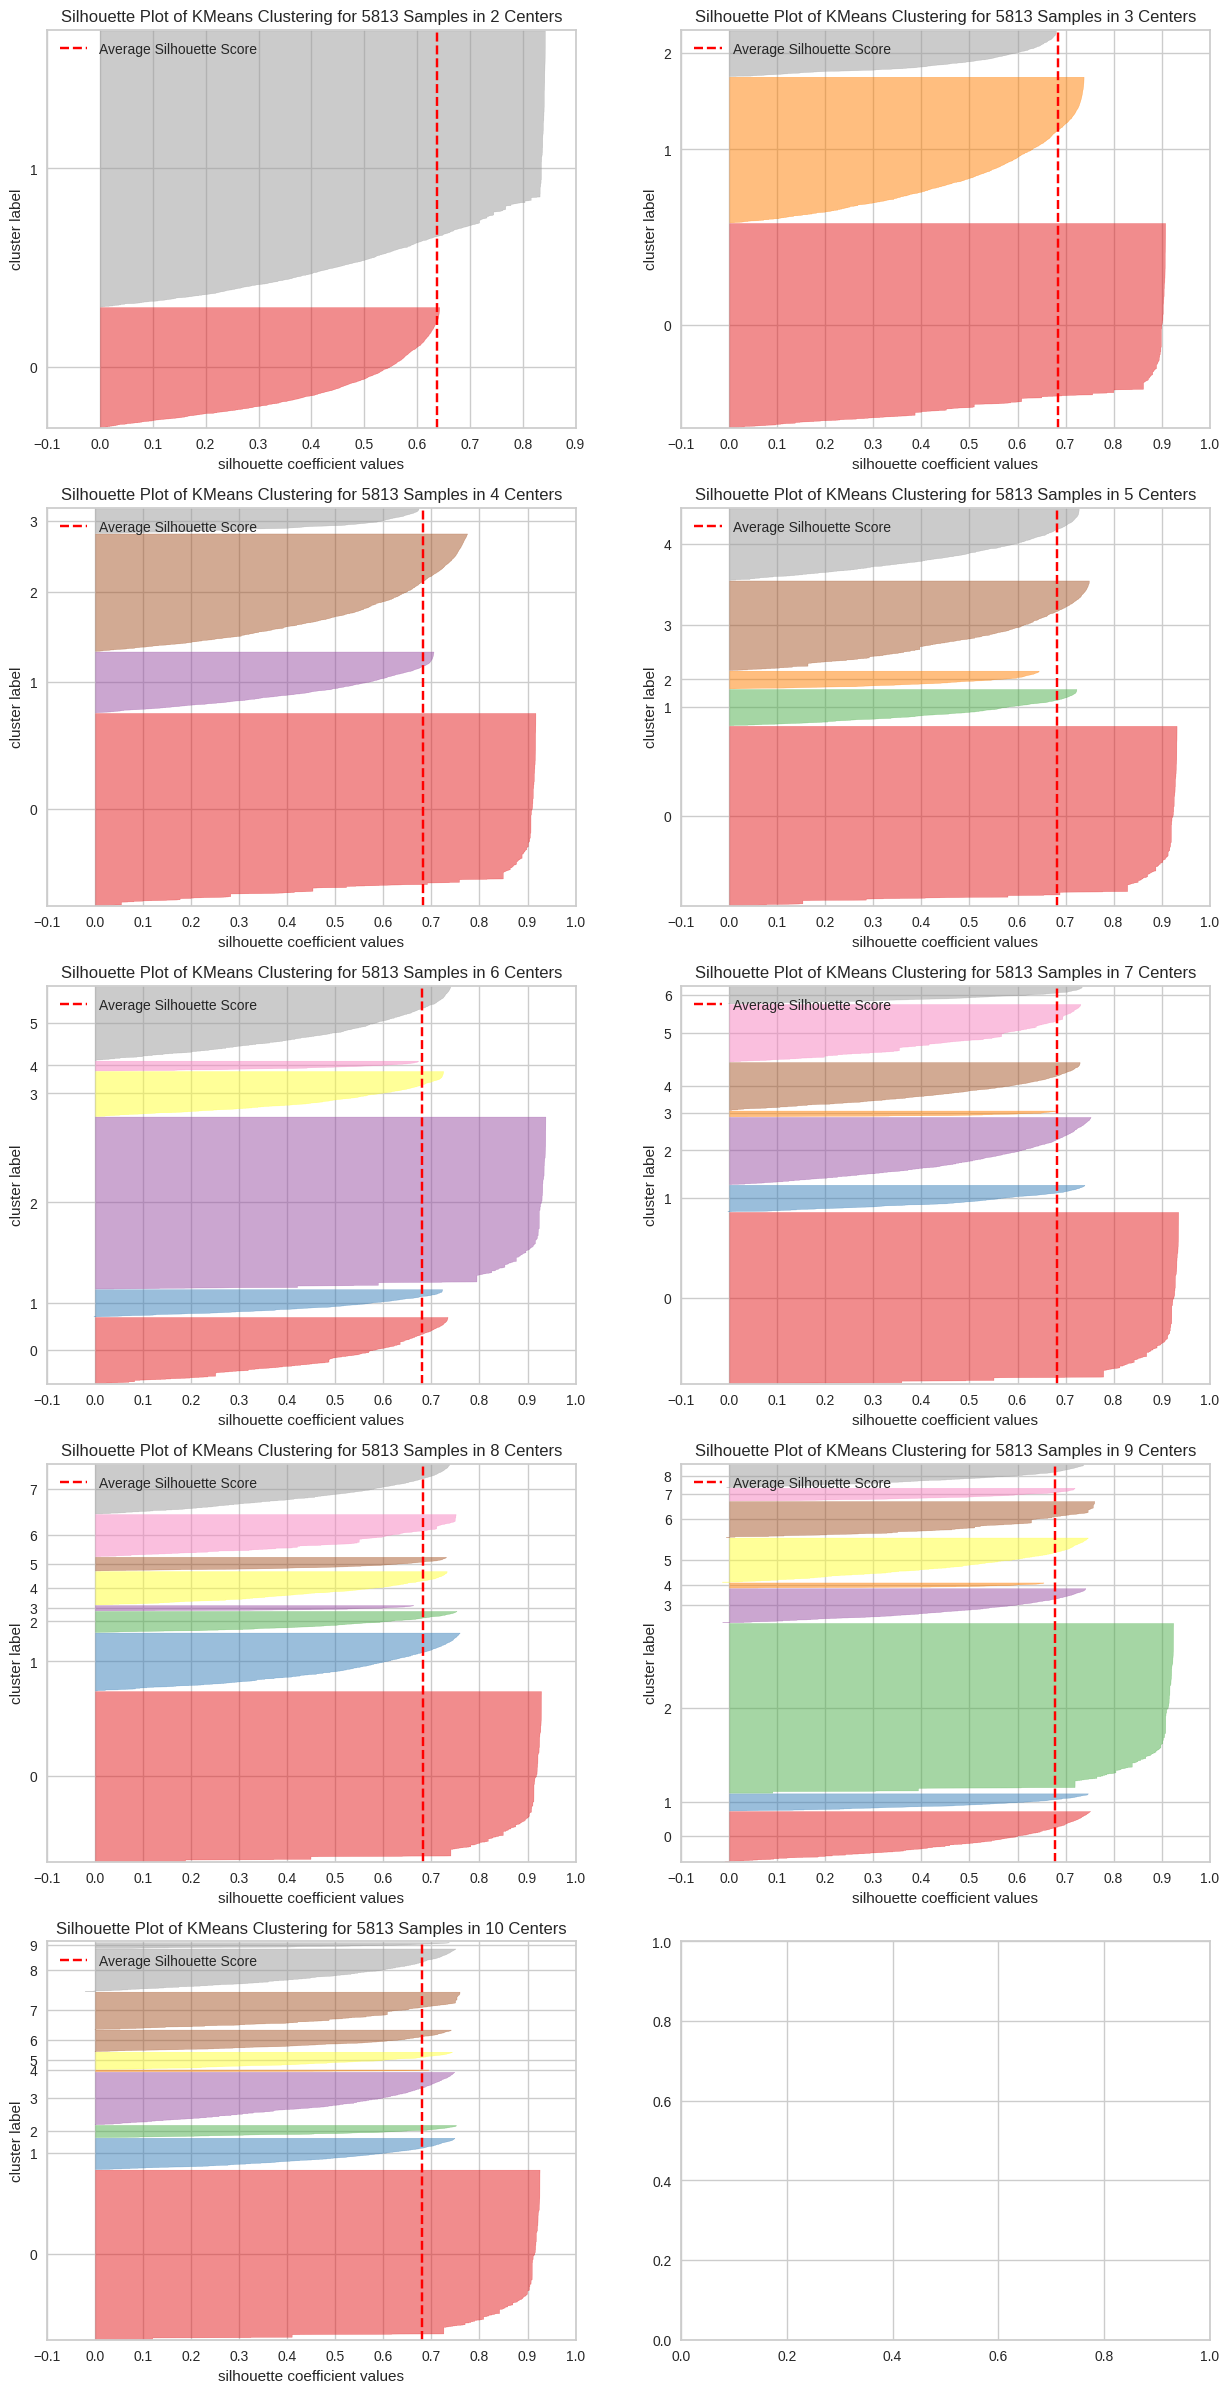

In [202]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(df_rfm)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [203]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#RFM Analysis

In [204]:
# RFM Analysis
# source: https://www.putler.com/rfm-analysis/

from pandasql import sqldf
pysqldfX = lambda q,ctx: sqldf(q, ctx)


In [205]:
df_rfm = df_rfm.rename(columns={'frequence': 'frequency'})

In [206]:
df_rfm_1 = df_rfm.copy()

In [207]:
quantiles = df_rfm_1.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

def r_score(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

def fm_score(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

df_rfm_1['r_quartile'] = df_rfm_1['recency'].apply(r_score, args=('recency',quantiles,))
df_rfm_1['f_quartile'] = df_rfm_1['frequency'].apply(fm_score, args=('frequency',quantiles,))
df_rfm_1['m_quartile'] = df_rfm_1['monetary'].apply(fm_score, args=('monetary',quantiles,))

<ipython-input-207-8b636a1abcf8>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  quantiles = df_rfm_1.quantile(q=[0.25,0.5,0.75])


In [208]:
df_rfm_1['rfm'] = df_rfm_1['r_quartile'].astype(str) + df_rfm_1['f_quartile'].astype(str) + df_rfm_1['m_quartile'].astype(str)

In [209]:
# convert the RFM score to a numeric value
df_rfm_1['rfm'] = pd.to_numeric(df_rfm_1['rfm'])

# define the segmentation function
def segment_rfm(df):
    r_quartile = df['r_quartile']
    f_quartile = df['f_quartile']
    m_quartile = df['m_quartile']

    if r_quartile > 2 and f_quartile > 2 and m_quartile > 2:
        return 'Loyal Users'
    elif r_quartile <= 2 and f_quartile <= 2:
        return 'Declining Buyers'
    else:
        return 'Stable Users'


# apply the segmentation function to each row of the dataframe
df_rfm_1['segment'] = df_rfm_1.apply(segment_rfm, axis=1)

# perform K-Means clustering to identify segments
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_rfm_1[['recency', 'frequency', 'monetary']])
df_rfm_1['cluster'] = kmeans.labels_

# print the results
print(df_rfm_1.groupby(['segment'])[['recency', 'frequency', 'monetary']].mean())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


                     recency  frequency      monetary
segment                                              
Declining Buyers  528.649060   1.374664  1.341531e+06
Loyal Users       118.104534   4.420655  6.614251e+06
Stable Users      204.301975   2.063555  2.534609e+06


In [210]:
df_rfm_1

user_id  recency  frequency  monetary  r_quartile  f_quartile  \
0          1      483          1    135000           1           1   
1         10      109          5  12270000           3           4   
2        100      523          4   3000000           1           4   
3       1002      444          3   5415000           1           3   
4       1003      328          2   2760000           2           2   
...      ...      ...        ...       ...         ...         ...   
5808     992      241          3   3690000           3           3   
5809     993      855          3   4365000           1           3   
5810     994       20          1     75000           4           1   
5811     997      818          1     95000           1           1   
5812     998      617          4   5530000           1           4   

      m_quartile  rfm           segment  cluster  
0              1  111  Declining Buyers        0  
1              4  344       Loyal Users        3  
2              3  143      Stable Users        4  
3              4  134      Stable Users        2  
4              3  223  Declining Buyers        4  
...          ...  ...               ...      ...  
5808           3  333       Loyal Users        2  
5809           4  134      Stable Users        2  
5810           1  411      Stable Users        0  
5811           1  111  Declining Buyers        0  
5812           4  144      Stable Users        2  

[5813 rows x 10 columns]

In [211]:
data_segment = df_rfm_1.copy()

# Data for funnel

In [171]:
data_funnel1 = data_segment.merge(df_sessions_ref, how='left', on=['user_id'])
data_funnel2 = data_funnel1.merge(df_events, how='left', on=['sessions_id'])
data_funnel2

user_id  recency  frequency  monetary  r_quartile  f_quartile  \
0            1      483          1    135000           1           1   
1            1      483          1    135000           1           1   
2            1      483          1    135000           1           1   
3            1      483          1    135000           1           1   
4            1      483          1    135000           1           1   
...        ...      ...        ...       ...         ...         ...   
377377     998      617          4   5530000           1           4   
377378     998      617          4   5530000           1           4   
377379     998      617          4   5530000           1           4   
377380     998      617          4   5530000           1           4   
377381     998      617          4   5530000           1           4   

        m_quartile  rfm           segment  cluster sessions_id  \
0                1  111  Declining Buyers        1        1883   
1                1  111  Declining Buyers        1        1376   
2                1  111  Declining Buyers        1      169218   
3                1  111  Declining Buyers        1      169218   
4                1  111  Declining Buyers        1       85153   
...            ...  ...               ...      ...         ...   
377377           4  144      Stable Users        2       99467   
377378           4  144      Stable Users        2       99467   
377379           4  144      Stable Users        2       51203   
377380           4  144      Stable Users        2       51203   
377381           4  144      Stable Users        2      167060   

         traffic_medium         visits_timestamps   traffic_source  \
0                Direct 2020-02-04 07:44:35+00:00           Direct   
1                Direct 2020-01-23 04:19:14+00:00           Direct   
2        Organic Search 2022-10-28 11:12:37+00:00           Google   
3        Organic Search 2022-10-28 11:12:37+00:00           Google   
4        Organic Search 2021-10-07 12:39:54+00:00           Google   
...                 ...                       ...              ...   
377377  unknown traffic 2021-11-18 07:40:00+00:00  unknown traffic   
377378  unknown traffic 2021-11-18 07:40:00+00:00  unknown traffic   
377379  unknown traffic 2021-02-28 13:23:42+00:00  unknown traffic   
377380  unknown traffic 2021-02-28 13:23:42+00:00  unknown traffic   
377381  unknown traffic 2022-10-21 19:00:21+00:00  unknown traffic   

           traffic_name event_id                event  \
0       unknown traffic     5263          productview   
1       unknown traffic     3854          productview   
2       unknown traffic   509299            addtocart   
3       unknown traffic   509298          productview   
4       unknown traffic   259933          productview   
...                 ...      ...                  ...   
377377    google search   299990       choosedelivery   
377378    google search   299992  changepaymentmethod   
377379    google search   151631            addtocart   
377380    google search   151628          productview   
377381    google search   503858          productview   

                       timestamp  
0      2020-02-04 07:44:35+00:00  
1      2020-01-23 04:19:14+00:00  
2      2022-10-28 11:19:41+00:00  
3      2022-10-28 11:12:37+00:00  
4      2021-10-07 12:39:54+00:00  
...                          ...  
377377 2021-11-18 07:45:35+00:00  
377378 2021-11-18 07:47:01+00:00  
377379 2021-02-28 13:25:48+00:00  
377380 2021-02-28 13:23:42+00:00  
377381 2022-10-21 19:00:21+00:00  

[377382 rows x 18 columns]

In [172]:
data_funnel2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377382 entries, 0 to 377381
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   user_id            377382 non-null  object             
 1   recency            377382 non-null  int64              
 2   frequency          377382 non-null  int64              
 3   monetary           377382 non-null  int64              
 4   r_quartile         377382 non-null  int64              
 5   f_quartile         377382 non-null  int64              
 6   m_quartile         377382 non-null  int64              
 7   rfm                377382 non-null  int64              
 8   segment            377382 non-null  object             
 9   cluster            377382 non-null  int32              
 10  sessions_id        377382 non-null  object             
 11  traffic_medium     377382 non-null  object             
 12  visits_timestamps  377382 non-

In [173]:
data_funnel2.isna().sum() #Checking missing value

user_id              0
recency              0
frequency            0
monetary             0
r_quartile           0
f_quartile           0
m_quartile           0
rfm                  0
segment              0
cluster              0
sessions_id          0
traffic_medium       0
visits_timestamps    0
traffic_source       0
traffic_name         0
event_id             0
event                0
timestamp            0
dtype: int64

In [174]:
data_funnel2.head(10)

user_id  recency  frequency  monetary  r_quartile  f_quartile  m_quartile  \
0       1      483          1    135000           1           1           1   
1       1      483          1    135000           1           1           1   
2       1      483          1    135000           1           1           1   
3       1      483          1    135000           1           1           1   
4       1      483          1    135000           1           1           1   
5       1      483          1    135000           1           1           1   
6       1      483          1    135000           1           1           1   
7       1      483          1    135000           1           1           1   
8       1      483          1    135000           1           1           1   
9       1      483          1    135000           1           1           1   

   rfm           segment  cluster sessions_id   traffic_medium  \
0  111  Declining Buyers        1        1883           Direct   
1  111  Declining Buyers        1        1376           Direct   
2  111  Declining Buyers        1      169218   Organic Search   
3  111  Declining Buyers        1      169218   Organic Search   
4  111  Declining Buyers        1       85153   Organic Search   
5  111  Declining Buyers        1       17225   Organic Social   
6  111  Declining Buyers        1       84381   Organic Social   
7  111  Declining Buyers        1           1  unknown traffic   
8  111  Declining Buyers        1           1  unknown traffic   
9  111  Declining Buyers        1           1  unknown traffic   

          visits_timestamps traffic_source     traffic_name event_id  \
0 2020-02-04 07:44:35+00:00         Direct  unknown traffic     5263   
1 2020-01-23 04:19:14+00:00         Direct  unknown traffic     3854   
2 2022-10-28 11:12:37+00:00         Google  unknown traffic   509299   
3 2022-10-28 11:12:37+00:00         Google  unknown traffic   509298   
4 2021-10-07 12:39:54+00:00         Google  unknown traffic   259933   
5 2020-08-22 04:37:51+00:00       Facebook  unknown traffic    53402   
6 2021-10-04 20:14:13+00:00       Facebook  unknown traffic   257737   
7 2019-12-01 01:14:49+00:00      Instagram  unknown traffic        3   
8 2019-12-01 01:14:49+00:00      Instagram  unknown traffic        2   
9 2019-12-01 01:14:49+00:00      Instagram  unknown traffic        1   

         event                 timestamp  
0  productview 2020-02-04 07:44:35+00:00  
1  productview 2020-01-23 04:19:14+00:00  
2    addtocart 2022-10-28 11:19:41+00:00  
3  productview 2022-10-28 11:12:37+00:00  
4  productview 2021-10-07 12:39:54+00:00  
5  productview 2020-08-22 04:37:51+00:00  
6  productview 2021-10-04 20:14:13+00:00  
7     viewcart 2019-12-01 01:20:50+00:00  
8    addtocart 2019-12-01 01:20:36+00:00  
9  productview 2019-12-01 01:14:49+00:00

In [175]:
data_funnel2

user_id  recency  frequency  monetary  r_quartile  f_quartile  \
0            1      483          1    135000           1           1   
1            1      483          1    135000           1           1   
2            1      483          1    135000           1           1   
3            1      483          1    135000           1           1   
4            1      483          1    135000           1           1   
...        ...      ...        ...       ...         ...         ...   
377377     998      617          4   5530000           1           4   
377378     998      617          4   5530000           1           4   
377379     998      617          4   5530000           1           4   
377380     998      617          4   5530000           1           4   
377381     998      617          4   5530000           1           4   

        m_quartile  rfm           segment  cluster sessions_id  \
0                1  111  Declining Buyers        1        1883   
1                1  111  Declining Buyers        1        1376   
2                1  111  Declining Buyers        1      169218   
3                1  111  Declining Buyers        1      169218   
4                1  111  Declining Buyers        1       85153   
...            ...  ...               ...      ...         ...   
377377           4  144      Stable Users        2       99467   
377378           4  144      Stable Users        2       99467   
377379           4  144      Stable Users        2       51203   
377380           4  144      Stable Users        2       51203   
377381           4  144      Stable Users        2      167060   

         traffic_medium         visits_timestamps   traffic_source  \
0                Direct 2020-02-04 07:44:35+00:00           Direct   
1                Direct 2020-01-23 04:19:14+00:00           Direct   
2        Organic Search 2022-10-28 11:12:37+00:00           Google   
3        Organic Search 2022-10-28 11:12:37+00:00           Google   
4        Organic Search 2021-10-07 12:39:54+00:00           Google   
...                 ...                       ...              ...   
377377  unknown traffic 2021-11-18 07:40:00+00:00  unknown traffic   
377378  unknown traffic 2021-11-18 07:40:00+00:00  unknown traffic   
377379  unknown traffic 2021-02-28 13:23:42+00:00  unknown traffic   
377380  unknown traffic 2021-02-28 13:23:42+00:00  unknown traffic   
377381  unknown traffic 2022-10-21 19:00:21+00:00  unknown traffic   

           traffic_name event_id                event  \
0       unknown traffic     5263          productview   
1       unknown traffic     3854          productview   
2       unknown traffic   509299            addtocart   
3       unknown traffic   509298          productview   
4       unknown traffic   259933          productview   
...                 ...      ...                  ...   
377377    google search   299990       choosedelivery   
377378    google search   299992  changepaymentmethod   
377379    google search   151631            addtocart   
377380    google search   151628          productview   
377381    google search   503858          productview   

                       timestamp  
0      2020-02-04 07:44:35+00:00  
1      2020-01-23 04:19:14+00:00  
2      2022-10-28 11:19:41+00:00  
3      2022-10-28 11:12:37+00:00  
4      2021-10-07 12:39:54+00:00  
...                          ...  
377377 2021-11-18 07:45:35+00:00  
377378 2021-11-18 07:47:01+00:00  
377379 2021-02-28 13:25:48+00:00  
377380 2021-02-28 13:23:42+00:00  
377381 2022-10-21 19:00:21+00:00  

[377382 rows x 18 columns]

In [176]:
data_funnel2.to_csv('data_funnel2.csv', index=False)

In [177]:
! ls

data_funnel2.csv  drive  sample_data


In [178]:
! cat data_funnel2.csv

Streaming output truncated to the last 5000 lines.
1055,20,5,10740000,4,4,4,444,Loyal Users,4,5668,unknown traffic,2020-04-10 03:31:03+00:00,unknown traffic,Instagram,16177,chooseaddress,2020-04-10 03:35:12+00:00
1055,20,5,10740000,4,4,4,444,Loyal Users,4,5668,unknown traffic,2020-04-10 03:31:03+00:00,unknown traffic,Instagram,16178,choosedelivery,2020-04-10 03:36:40+00:00
1055,20,5,10740000,4,4,4,444,Loyal Users,4,5668,unknown traffic,2020-04-10 03:31:03+00:00,unknown traffic,Instagram,16179,changepaymentmethod,2020-04-10 03:37:59+00:00
1055,20,5,10740000,4,4,4,444,Loyal Users,4,5302,CPC,2020-04-05 02:18:05+00:00,Google,youtube.com,15036,productview,2020-04-05 02:18:05+00:00
1055,20,5,10740000,4,4,4,444,Loyal Users,4,32065,CPC,2020-11-22 09:10:56+00:00,Google,youtube.com,95708,viewcart,2020-11-22 09:13:03+00:00
1055,20,5,10740000,4,4,4,444,Loyal Users,4,32065,CPC,2020-11-22 09:10:56+00:00,Google,youtube.com,95707,addtocart,2020-11-22 09:12:49+00:00
1055,20,5,10740000,4,4,4,444,Loyal U

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
1559,394,5,6040000,2,4,4,244,Stable Users,0,12140,Email,2020-06-27 09:41:10+00:00,Newsletter,unknown traffic,36845,productview,2020-06-27 09:41:10+00:00
1559,394,5,6040000,2,4,4,244,Stable Users,0,58501,Email,2021-04-11 17:07:29+00:00,Newsletter,unknown traffic,174999,viewcart,2021-04-11 17:09:47+00:00
1559,394,5,6040000,2,4,4,244,Stable Users,0,58501,Email,2021-04-11 17:07:29+00:00,Newsletter,unknown traffic,174998,addtocart,2021-04-11 17:09:35+00:00
1559,394,5,6040000,2,4,4,244,Stable Users,0,58501,Email,2021-04-11 17:07:29+00:00,Newsletter,unknown traffic,174996,productview,2021-04-11 17:07:29+00:00
1559,394,5,6040000,2,4,4,244,Stable Users,0,58501,Email,2021-04-11 17:07:29+00:00,Newsletter,unknown traffic,175000,chooseaddress,2021-04-11 17:11:34+00:00
1559,394,5,6040000,2,4,4,244,Stable Users,0,60919,Email,2021-04-27 15:44:55+00:00,Newsletter,unknown traffic,182912,viewcart,2021-04-27 15:47:16+00:00
1559,394,5,6040000,2,4,4,244,Sta

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



+00:00,Google,unknown traffic,449948,complete,2022-06-24 16:14:26+00:00
1914,190,5,5550000,3,4,4,344,Loyal Users,2,149202,Organic Search,2022-06-24 16:05:38+00:00,Google,unknown traffic,449943,viewcart,2022-06-24 16:07:42+00:00
1914,190,5,5550000,3,4,4,344,Loyal Users,2,149202,Organic Search,2022-06-24 16:05:38+00:00,Google,unknown traffic,449942,addtocart,2022-06-24 16:07:26+00:00
1914,190,5,5550000,3,4,4,344,Loyal Users,2,149202,Organic Search,2022-06-24 16:05:38+00:00,Google,unknown traffic,449941,productview,2022-06-24 16:05:38+00:00
1914,190,5,5550000,3,4,4,344,Loyal Users,2,149202,Organic Search,2022-06-24 16:05:38+00:00,Google,unknown traffic,449944,chooseaddress,2022-06-24 16:09:44+00:00
1914,190,5,5550000,3,4,4,344,Loyal Users,2,149202,Organic Search,2022-06-24 16:05:38+00:00,Google,unknown traffic,449945,choosedelivery,2022-06-24 16:11:30+00:00
1914,190,5,5550000,3,4,4,344,Loyal Users,2,149202,Organic Search,2022-06-24 16:05:38+00:00,Google,unknown traffic,449946,changepaymen

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
227,167,2,3010000,3,2,3,323,Stable Users,3,28315,Organic Social,2020-11-05 05:10:24+00:00,Facebook,unknown traffic,85609,viewcart,2020-11-05 05:12:53+00:00
227,167,2,3010000,3,2,3,323,Stable Users,3,28315,Organic Social,2020-11-05 05:10:24+00:00,Facebook,unknown traffic,85607,addtocart,2020-11-05 05:12:39+00:00
227,167,2,3010000,3,2,3,323,Stable Users,3,28315,Organic Social,2020-11-05 05:10:24+00:00,Facebook,unknown traffic,85605,productview,2020-11-05 05:10:24+00:00
227,167,2,3010000,3,2,3,323,Stable Users,3,13874,Organic Social,2020-07-15 20:29:32+00:00,Facebook,unknown traffic,42532,viewcart,2020-07-15 20:32:18+00:00
227,167,2,3010000,3,2,3,323,Stable Users,3,13874,Organic Social,2020-07-15 20:29:32+00:00,Facebook,unknown traffic,42531,addtocart,2020-07-15 20:32:04+00:00
227,167,2,3010000,3,2,3,323,Stable Users,3,13874,Organic Social,2020-07-15 20:29:32+00:00,Facebook,unknown traffic,42529,productview,2020-07-15 20:29:32+00:00
227,1

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
3024,23,2,5720000,4,2,4,424,Stable Users,2,183469,CPC,2022-12-08 15:09:36+00:00,Facebook,Facebook,546004,complete,2022-12-08 15:24:22+00:00
3024,23,2,5720000,4,2,4,424,Stable Users,2,183469,CPC,2022-12-08 15:09:36+00:00,Facebook,Facebook,545997,viewcart,2022-12-08 15:12:10+00:00
3024,23,2,5720000,4,2,4,424,Stable Users,2,183469,CPC,2022-12-08 15:09:36+00:00,Facebook,Facebook,545996,addtocart,2022-12-08 15:11:58+00:00
3024,23,2,5720000,4,2,4,424,Stable Users,2,183469,CPC,2022-12-08 15:09:36+00:00,Facebook,Facebook,545995,productview,2022-12-08 15:09:36+00:00
3024,23,2,5720000,4,2,4,424,Stable Users,2,183469,CPC,2022-12-08 15:09:36+00:00,Facebook,Facebook,545999,chooseaddress,2022-12-08 15:14:23+00:00
3024,23,2,5720000,4,2,4,424,Stable Users,2,183469,CPC,2022-12-08 15:09:36+00:00,Facebook,Facebook,546000,choosedelivery,2022-12-08 15:16:48+00:00
3024,23,2,5720000,4,2,4,424,Stable Users,2,183469,CPC,2022-12-08 15:09:36+00:00,Facebook,Faceb

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
3252,336,2,3035000,2,2,3,223,Declining Buyers,3,54843,Direct,2021-03-21 07:46:30+00:00,Direct,unknown traffic,163240,addtocart,2021-03-21 07:49:13+00:00
3252,336,2,3035000,2,2,3,223,Declining Buyers,3,54843,Direct,2021-03-21 07:46:30+00:00,Direct,unknown traffic,163235,productview,2021-03-21 07:46:30+00:00
3252,336,2,3035000,2,2,3,223,Declining Buyers,3,54843,Direct,2021-03-21 07:46:30+00:00,Direct,unknown traffic,163245,chooseaddress,2021-03-21 07:52:06+00:00
3252,336,2,3035000,2,2,3,223,Declining Buyers,3,54843,Direct,2021-03-21 07:46:30+00:00,Direct,unknown traffic,163247,choosedelivery,2021-03-21 07:54:47+00:00
3252,336,2,3035000,2,2,3,223,Declining Buyers,3,54843,Direct,2021-03-21 07:46:30+00:00,Direct,unknown traffic,163248,changepaymentmethod,2021-03-21 07:57:29+00:00
3252,336,2,3035000,2,2,3,223,Declining Buyers,3,39120,Organic Search,2020-12-23 04:52:00+00:00,Google,unknown traffic,114303,checkout,2020-12-23 05:04:19+00:00
325

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
3765,48,4,5970000,4,4,4,444,Loyal Users,0,174676,Organic Social,2022-11-13 07:03:59+00:00,Facebook,unknown traffic,523517,checkout,2022-11-13 07:12:15+00:00
3765,48,4,5970000,4,4,4,444,Loyal Users,0,174676,Organic Social,2022-11-13 07:03:59+00:00,Facebook,unknown traffic,523519,complete,2022-11-13 07:13:00+00:00
3765,48,4,5970000,4,4,4,444,Loyal Users,0,174676,Organic Social,2022-11-13 07:03:59+00:00,Facebook,unknown traffic,523507,viewcart,2022-11-13 07:06:10+00:00
3765,48,4,5970000,4,4,4,444,Loyal Users,0,174676,Organic Social,2022-11-13 07:03:59+00:00,Facebook,unknown traffic,523506,addtocart,2022-11-13 07:05:55+00:00
3765,48,4,5970000,4,4,4,444,Loyal Users,0,174676,Organic Social,2022-11-13 07:03:59+00:00,Facebook,unknown traffic,523502,productview,2022-11-13 07:03:59+00:00
3765,48,4,5970000,4,4,4,444,Loyal Users,0,174676,Organic Social,2022-11-13 07:03:59+00:00,Facebook,unknown traffic,523509,chooseaddress,2022-11-13 07:08:01+00:0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
596,951,1,240000,1,1,2,112,Declining Buyers,1,36907,unknown traffic,2020-12-13 13:05:37+00:00,unknown traffic,google search,108367,productview,2020-12-13 13:05:37+00:00
5960,405,2,2950000,2,2,3,223,Declining Buyers,3,81929,Direct,2021-09-23 08:42:41+00:00,Direct,unknown traffic,250500,viewcart,2021-09-23 08:45:40+00:00
5960,405,2,2950000,2,2,3,223,Declining Buyers,3,81929,Direct,2021-09-23 08:42:41+00:00,Direct,unknown traffic,250499,addtocart,2021-09-23 08:45:25+00:00
5960,405,2,2950000,2,2,3,223,Declining Buyers,3,81929,Direct,2021-09-23 08:42:41+00:00,Direct,unknown traffic,250498,productview,2021-09-23 08:42:41+00:00
5960,405,2,2950000,2,2,3,223,Declining Buyers,3,81929,Direct,2021-09-23 08:42:41+00:00,Direct,unknown traffic,250501,chooseaddress,2021-09-23 08:48:11+00:00
5960,405,2,2950000,2,2,3,223,Declining Buyers,3,81929,Direct,2021-09-23 08:42:41+00:00,Direct,unknown traffic,250502,choosedelivery,2021-09-23 08:50:44+00:00
5960,

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Streaming output truncated to the last 5000 lines.
825,112,6,16370000,3,4,4,344,Loyal Users,4,8924,CPC,2020-05-21 16:24:42+00:00,Facebook,Facebook,26370,choosedelivery,2020-05-21 16:30:19+00:00
825,112,6,16370000,3,4,4,344,Loyal Users,4,8924,CPC,2020-05-21 16:24:42+00:00,Facebook,Facebook,26371,changepaymentmethod,2020-05-21 16:31:48+00:00
825,112,6,16370000,3,4,4,344,Loyal Users,4,130812,unknown traffic,2022-03-11 05:42:28+00:00,unknown traffic,Instagram,391601,viewcart,2022-03-11 05:44:33+00:00
825,112,6,16370000,3,4,4,344,Loyal Users,4,130812,unknown traffic,2022-03-11 05:42:28+00:00,unknown traffic,Instagram,391600,addtocart,2022-03-11 05:44:21+00:00
825,112,6,16370000,3,4,4,344,Loyal Users,4,130812,unknown traffic,2022-03-11 05:42:28+00:00,unknown traffic,Instagram,391599,productview,2022-03-11 05:42:28+00:00
825,112,6,16370000,3,4,4,344,Loyal Users,4,83760,unknown traffic,2021-10-03 08:47:00+00:00,unknown traffic,Instagram,255900,productview,2021-10-03 08:47:00+00:00
825,112,6,16

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# Data for Market basket

In [179]:
data_mba1 = data_segment.merge(df_sessions_ref, how='inner', on=['user_id'])
data_mba2 = data_mba1.merge(df_transactions, how='inner', on=['sessions_id'])
data_mba3 = data_mba2.merge(df_transaction_item, how='inner', on=['transactions_id'])
data_mba4 = data_mba3.merge(df_products, how='left', on=['product_id'])
data_mba4

user_id  recency  frequency  monetary  r_quartile  f_quartile  \
0           1      483          1    135000           1           1   
1           1      483          1    135000           1           1   
2          10      109          5  12270000           3           4   
3          10      109          5  12270000           3           4   
4          10      109          5  12270000           3           4   
...       ...      ...        ...       ...         ...         ...   
42675     998      617          4   5530000           1           4   
42676     998      617          4   5530000           1           4   
42677     998      617          4   5530000           1           4   
42678     998      617          4   5530000           1           4   
42679     998      617          4   5530000           1           4   

       m_quartile  rfm           segment  cluster  ...  \
0               1  111  Declining Buyers        1  ...   
1               1  111  Declining Buyers        1  ...   
2               4  344       Loyal Users        4  ...   
3               4  344       Loyal Users        4  ...   
4               4  344       Loyal Users        4  ...   
...           ...  ...               ...      ...  ...   
42675           4  144      Stable Users        2  ...   
42676           4  144      Stable Users        2  ...   
42677           4  144      Stable Users        2  ...   
42678           4  144      Stable Users        2  ...   
42679           4  144      Stable Users        2  ...   

        transactions_timestamps     status voucher_id transaction_items_id  \
0     2021-09-04 13:17:34+00:00  completed          4                26466   
1     2021-09-04 13:17:34+00:00  completed          4                26467   
2     2020-05-31 12:23:18+00:00   canceled          3                 2910   
3     2020-05-31 12:23:18+00:00   canceled          3                 2907   
4     2020-05-31 12:23:18+00:00   canceled          3                 2908   
...                         ...        ...        ...                  ...   
42675 2020-07-15 13:47:34+00:00  completed          1                 4570   
42676 2021-11-18 07:48:45+00:00   canceled          4                32316   
42677 2021-11-18 07:48:45+00:00   canceled          4                32315   
42678 2021-11-18 07:48:45+00:00   canceled          4                32314   
42679 2021-11-18 07:48:45+00:00   canceled          4                32313   

      product_qty product_amount product_price  product_id product_category  \
0               1         100000        100000          10      Electronics   
1               1          35000         35000          64       Stationery   
2               1         180000        180000          60  Sport Equipment   
3               1         350000        350000          29        Groceries   
4               1         900000        900000          38          Hobbies   
...           ...            ...           ...         ...              ...   
42675           1         450000        450000          55  Sport Equipment   
42676           1         500000        500000          20            Games   
42677           1        1300000       1300000          40          Hobbies   
42678           1         200000        200000          14      Electronics   
42679           1         120000        120000           4         Clothing   

            product_name  
0          Electronics A  
1           Stationery D  
2      Sport Equipment F  
3            Groceries H  
4              Hobbies B  
...                  ...  
42675  Sport Equipment A  
42676            Games E  
42677          Hobbies D  
42678      Electronics E  
42679         Clothing D  

[42680 rows x 28 columns]

In [180]:
data_mba4.isna().sum()

user_id                    0
recency                    0
frequency                  0
monetary                   0
r_quartile                 0
f_quartile                 0
m_quartile                 0
rfm                        0
segment                    0
cluster                    0
sessions_id                0
traffic_medium             0
visits_timestamps          0
traffic_source             0
traffic_name               0
transactions_id            0
payment_method_id          0
total_amount               0
transactions_timestamps    0
status                     0
voucher_id                 0
transaction_items_id       0
product_qty                0
product_amount             0
product_price              0
product_id                 0
product_category           0
product_name               0
dtype: int64

In [181]:
data_mba4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42680 entries, 0 to 42679
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   user_id                  42680 non-null  object             
 1   recency                  42680 non-null  int64              
 2   frequency                42680 non-null  int64              
 3   monetary                 42680 non-null  int64              
 4   r_quartile               42680 non-null  int64              
 5   f_quartile               42680 non-null  int64              
 6   m_quartile               42680 non-null  int64              
 7   rfm                      42680 non-null  int64              
 8   segment                  42680 non-null  object             
 9   cluster                  42680 non-null  int32              
 10  sessions_id              42680 non-null  object             
 11  traffic_medium           426

## Market basket analysis

In [182]:
cust_level = data_mba4[["user_id", "product_name"]].sort_values(by = "user_id", ascending = False) ## Selecting only required variables for modelling
cust_level['product_name'] = cust_level['product_name'].str.strip() # Removing white spaces if any
cust_level

user_id     product_name
42679     998       Clothing D
42664     998  Health&Beauty C
42650     998          Games E
42651     998      Groceries H
42652     998    Electronics A
...       ...              ...
25         10       Clothing D
26         10      Groceries C
3          10      Groceries H
1           1     Stationery D
0           1    Electronics A

[42680 rows x 2 columns]

In [183]:
transactions = [a[1]['product_name'].tolist() for a in list(cust_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer

<ipython-input-183-0cf751226663>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  transactions = [a[1]['product_name'].tolist() for a in list(cust_level.groupby(['user_id']))] ## Combing all the items in list format for each cutomer


In [184]:
transactions

[['Stationery D', 'Electronics A'],
 ['Electronics C',
  'Hobbies E',
  'Groceries D',
  'Electronics E',
  'Sport Equipment A',
  'Mother&Care D',
  'Groceries H',
  'Hobbies D',
  'Stationery E',
  'Hobbies B',
  'Hobbies D',
  'Shoes C',
  'Sport Equipment F',
  'Health&Beauty F',
  'Electronics C',
  'Clothing A',
  'Sport Equipment A',
  'Games B',
  'Shoes E',
  'Electronics D',
  'Health&Beauty A',
  'Electronics D',
  'Clothing D',
  'Groceries C',
  'Groceries H'],
 ['Groceries E',
  'Clothing D',
  'Health&Beauty E',
  'Shoes E',
  'Stationery E',
  'Clothing B',
  'Mother&Care F',
  'Health&Beauty D',
  'Electronics C',
  'Games A',
  'Groceries C',
  'Clothing B',
  'Sport Equipment C',
  'Health&Beauty F',
  'Groceries C',
  'Clothing B',
  'Stationery B',
  'Health&Beauty E',
  'Sport Equipment A',
  'Sport Equipment B',
  'Stationery E',
  'Stationery A',
  'Health&Beauty C',
  'Clothing I',
  'Sport Equipment E',
  'Electronics E',
  'Shoes D',
  'Clothing D',
  'Health

In [185]:
#Importing and Setting the apriori options
#1. Minimum Support
#2. Minimum Confidence
#3. Minimum Lift
#4. Lenght = the number of items

In [186]:
from apyori import apriori ## Importing apriori package
rules = apriori(transactions = transactions,
                min_support = 0.002,
                min_confidence = 0.05,
                min_lift = 3,
                min_length = 2,
                max_length = 2) ## Model Creation

In [187]:
results = list(rules)

In [188]:
## Creating user-defined function for arranging the results obtained from model into readable format

def inspect(results):
    x         = [tuple(result[2][0][0])[0] for result in results]
    y         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(x, y, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['X', 'Y', 'Support', 'Confidence', 'Lift'])

### Result

In [189]:
resultsinDataFrame.nlargest(n=10, columns="Lift") ## Showing best possible scenarios

X             Y   Support  Confidence      Lift
85         Games E   Groceries D  0.043351    0.481836  4.804306
86         Games E   Groceries E  0.044727    0.497132  4.768693
177    Groceries D  Stationery E  0.058834    0.586621  4.723030
89         Games E     Hobbies D  0.055909    0.621415  4.584118
28   Electronics D       Games E  0.040427    0.410839  4.566363
81         Games E       Games F  0.016515    0.183556  4.559886
190    Groceries E  Stationery E  0.059006    0.566007  4.557059
99         Games E  Stationery E  0.050920    0.565966  4.556728
160    Groceries C  Stationery E  0.058490    0.563847  4.539675
191    Groceries E  Stationery F  0.017203    0.165017  4.482434